In [14]:
from __future__ import print_function, division
import sys, os, time
import molgrid

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('bright')
from IPython import display
%matplotlib inline

In [32]:
import openbabel as ob

old_data_file = '/home/mtr22/cnn/gan/data/lowrmsd.types'
new_data_file = '/home/mtr22/cnn/gan/data/small.types'
data_root = '/home/mtr22/PDBbind/refined-set/'

conv = ob.OBConversion()
oldf = open(old_data_file, 'r')
newf = open(new_data_file, 'w')
for line in oldf:
    target = line.split()[2].split('/')[0]
    lig_file = data_root + target + '/' + target + '_min.sdf'
    mol = ob.OBMol()
    conv.ReadFile(mol, lig_file)
    mol.DeleteHydrogens()
    if mol.NumAtoms() <= 20: # TODO why is this not working?
        newf.write(line)
        print(mol.NumAtoms(), line, end='')
    
oldf.close()
newf.close()

12 1 6.5229 1alw/1alw_rec.gninatypes 1alw/1alw_ligand_7.gninatypes # 1.60994 -5.22838
12 1 6.5229 1alw/1alw_rec.gninatypes 1alw/1alw_ligand_10.gninatypes # 1.0434 -4.85317
9 1 4.3010 1amk/1amk_rec.gninatypes 1amk/1amk_ligand_2.gninatypes # 1.4087 -5.71136
9 1 4.3010 1amk/1amk_rec.gninatypes 1amk/1amk_min.gninatypes # 0.924963 -5.57349
10 1 8.0000 1b57/1b57_rec.gninatypes 1b57/1b57_min.gninatypes # 1.28019 -6.19858
20 1 10.5229 1b8n/1b8n_rec.gninatypes 1b8n/1b8n_ligand_1.gninatypes # 1.12898 -9.6595
20 1 10.5229 1b8n/1b8n_rec.gninatypes 1b8n/1b8n_min.gninatypes # 0.708213 -9.70241
19 1 10.6383 1b8o/1b8o_rec.gninatypes 1b8o/1b8o_ligand_2.gninatypes # 1.27311 -8.81713
19 1 10.6383 1b8o/1b8o_rec.gninatypes 1b8o/1b8o_min.gninatypes # 0.712794 -9.64143
8 1 8.6990 1bcd/1bcd_rec.gninatypes 1bcd/1bcd_ligand_0.gninatypes # 1.60368 -5.65825
8 1 8.6990 1bcd/1bcd_rec.gninatypes 1bcd/1bcd_ligand_1.gninatypes # 0.442486 -5.63452
8 1 8.6990 1bcd/1bcd_rec.gninatypes 1bcd/1bcd_ligand_2.gninatypes # 0.43

8 1 7.2218 1sw2/1sw2_rec.gninatypes 1sw2/1sw2_ligand_0.gninatypes # 0.888657 -5.0898
8 1 7.2218 1sw2/1sw2_rec.gninatypes 1sw2/1sw2_ligand_1.gninatypes # 0.94678 -5.04957
8 1 7.2218 1sw2/1sw2_rec.gninatypes 1sw2/1sw2_ligand_3.gninatypes # 1.6713 -4.21304
8 1 7.2218 1sw2/1sw2_rec.gninatypes 1sw2/1sw2_min.gninatypes # 0.273358 -5.0646
16 1 7.3575 1swg/1swg_rec.gninatypes 1swg/1swg_ligand_3.gninatypes # 1.08086 -6.35153
16 1 7.3575 1swg/1swg_rec.gninatypes 1swg/1swg_min.gninatypes # 0.813289 -7.05451
17 1 6.4056 1syh/1syh_rec.gninatypes 1syh/1syh_min.gninatypes # 0.16397 -9.55163
17 1 5.4449 1syi/1syi_rec.gninatypes 1syi/1syi_ligand_0.gninatypes # 0.252323 -9.28515
17 1 5.4449 1syi/1syi_rec.gninatypes 1syi/1syi_min.gninatypes # 0.144857 -9.59363
20 1 4.3665 1td7/1td7_rec.gninatypes 1td7/1td7_ligand_20.gninatypes # 1.89392 -6.73738
20 1 4.3665 1td7/1td7_rec.gninatypes 1td7/1td7_min.gninatypes # 0.66647 -6.66065
13 1 4.0506 1tuf/1tuf_rec.gninatypes 1tuf/1tuf_min.gninatypes # 1.62532 -4.18397

9 1 3.2218 2ri9/2ri9_rec.gninatypes 2ri9/2ri9_ligand_13.gninatypes # 1.97403 -4.83229
9 1 3.2218 2ri9/2ri9_rec.gninatypes 2ri9/2ri9_ligand_17.gninatypes # 1.84647 -4.64579
9 1 3.2218 2ri9/2ri9_rec.gninatypes 2ri9/2ri9_min.gninatypes # 0.427201 -4.52447
7 1 3.6383 2rk8/2rk8_rec.gninatypes 2rk8/2rk8_ligand_14.gninatypes # 1.92855 -5.39837
7 1 3.6383 2rk8/2rk8_rec.gninatypes 2rk8/2rk8_min.gninatypes # 0.634951 -4.89714
19 1 3.9031 2rkm/2rkm_rec.gninatypes 2rkm/2rkm_min.gninatypes # 0.382841 -7.09559
20 1 3.4202 2sim/2sim_rec.gninatypes 2sim/2sim_ligand_0.gninatypes # 1.83494 -7.60582
20 1 3.4202 2sim/2sim_rec.gninatypes 2sim/2sim_ligand_1.gninatypes # 1.1584 -7.48075
20 1 3.4202 2sim/2sim_rec.gninatypes 2sim/2sim_min.gninatypes # 0.44883 -7.45155
13 1 5.8861 2tmn/2tmn_rec.gninatypes 2tmn/2tmn_ligand_0.gninatypes # 0.682714 -7.59757
13 1 5.8861 2tmn/2tmn_rec.gninatypes 2tmn/2tmn_min.gninatypes # 0.769397 -5.80067
13 1 4.6778 2uy4/2uy4_rec.gninatypes 2uy4/2uy4_ligand_1.gninatypes # 1.85938 

20 1 5.5086 3kgt/3kgt_rec.gninatypes 3kgt/3kgt_ligand_11.gninatypes # 1.62975 -6.74219
20 1 5.5086 3kgt/3kgt_rec.gninatypes 3kgt/3kgt_min.gninatypes # 0.209773 -7.48464
9 1 4.6990 3kiv/3kiv_rec.gninatypes 3kiv/3kiv_ligand_0.gninatypes # 1.29138 -4.39929
9 1 4.6990 3kiv/3kiv_rec.gninatypes 3kiv/3kiv_min.gninatypes # 0.609696 -4.24178
18 1 8.5376 3kjd/3kjd_rec.gninatypes 3kjd/3kjd_ligand_2.gninatypes # 1.533 -8.90296
18 1 8.5376 3kjd/3kjd_rec.gninatypes 3kjd/3kjd_ligand_3.gninatypes # 1.14284 -8.73337
18 1 8.5376 3kjd/3kjd_rec.gninatypes 3kjd/3kjd_ligand_4.gninatypes # 1.92861 -8.45272
18 1 8.5376 3kjd/3kjd_rec.gninatypes 3kjd/3kjd_min.gninatypes # 0.39624 -8.83982
14 1 6.0000 3l4w/3l4w_rec.gninatypes 3l4w/3l4w_min.gninatypes # 0.39354 -6.68772
8 1 5.3979 3l6h/3l6h_rec.gninatypes 3l6h/3l6h_ligand_0.gninatypes # 0.196905 -4.83727
8 1 5.3979 3l6h/3l6h_rec.gninatypes 3l6h/3l6h_min.gninatypes # 0.270694 -4.89163
19 1 2.4609 3l79/3l79_rec.gninatypes 3l79/3l79_ligand_0.gninatypes # 0.757646 -1

13 1 3.0458 4g5f/4g5f_rec.gninatypes 4g5f/4g5f_min.gninatypes # 0.588671 -6.41479
12 1 7.8928 4g8m/4g8m_rec.gninatypes 4g8m/4g8m_ligand_0.gninatypes # 0.623553 -8.51323
12 1 7.8928 4g8m/4g8m_rec.gninatypes 4g8m/4g8m_ligand_5.gninatypes # 1.85841 -7.10142
12 1 7.8928 4g8m/4g8m_rec.gninatypes 4g8m/4g8m_min.gninatypes # 0.368713 -7.51924
18 1 6.6198 4gfo/4gfo_rec.gninatypes 4gfo/4gfo_ligand_12.gninatypes # 1.88102 -7.42585
18 1 6.6198 4gfo/4gfo_rec.gninatypes 4gfo/4gfo_ligand_13.gninatypes # 1.86332 -7.41856
18 1 6.6198 4gfo/4gfo_rec.gninatypes 4gfo/4gfo_min.gninatypes # 0.316755 -6.92359
20 1 7.8447 4gzp/4gzp_rec.gninatypes 4gzp/4gzp_ligand_4.gninatypes # 1.1118 -6.34707
20 1 7.8447 4gzp/4gzp_rec.gninatypes 4gzp/4gzp_ligand_17.gninatypes # 1.94306 -5.64107
20 1 7.8447 4gzp/4gzp_rec.gninatypes 4gzp/4gzp_min.gninatypes # 0.90433 -6.26537
12 1 5.1249 4h81/4h81_rec.gninatypes 4h81/4h81_ligand_0.gninatypes # 0.577494 -7.2563
12 1 5.1249 4h81/4h81_rec.gninatypes 4h81/4h81_ligand_1.gninatypes #

9 1 4.3098 1ajq/1ajq_rec.gninatypes 1ajq/1ajq_ligand_0.gninatypes # 1.42562 -5.49227
9 1 4.3098 1ajq/1ajq_rec.gninatypes 1ajq/1ajq_ligand_1.gninatypes # 1.75034 -5.30463
9 1 4.3098 1ajq/1ajq_rec.gninatypes 1ajq/1ajq_ligand_4.gninatypes # 1.34875 -4.36872
9 1 4.3098 1ajq/1ajq_rec.gninatypes 1ajq/1ajq_min.gninatypes # 0.221912 -5.14491
8 1 3.9031 1avn/1avn_rec.gninatypes 1avn/1avn_min.gninatypes # 1.82184 -2.23107
15 1 3.1273 1ax0/1ax0_rec.gninatypes 1ax0/1ax0_ligand_0.gninatypes # 0.620009 -6.36762
15 1 3.1273 1ax0/1ax0_rec.gninatypes 1ax0/1ax0_min.gninatypes # 0.238522 -6.08103
13 1 6.0969 1azm/1azm_rec.gninatypes 1azm/1azm_ligand_0.gninatypes # 0.589943 -6.32482
13 1 6.0969 1azm/1azm_rec.gninatypes 1azm/1azm_ligand_2.gninatypes # 1.29384 -6.12702
13 1 6.0969 1azm/1azm_rec.gninatypes 1azm/1azm_ligand_15.gninatypes # 1.88199 -5.37682
13 1 6.0969 1azm/1azm_rec.gninatypes 1azm/1azm_min.gninatypes # 0.949304 -6.14362
20 1 4.7959 1bju/1bju_rec.gninatypes 1bju/1bju_min.gninatypes # 0.950568 

20 1 6.5229 1k9s/1k9s_rec.gninatypes 1k9s/1k9s_ligand_1.gninatypes # 0.657163 -8.84854
20 1 6.5229 1k9s/1k9s_rec.gninatypes 1k9s/1k9s_min.gninatypes # 0.849552 -8.52329
10 1 5.5229 1kc7/1kc7_rec.gninatypes 1kc7/1kc7_ligand_3.gninatypes # 1.73104 -5.34006
10 1 5.5229 1kc7/1kc7_rec.gninatypes 1kc7/1kc7_min.gninatypes # 0.942338 -4.54517
14 1 5.0969 1kmy/1kmy_rec.gninatypes 1kmy/1kmy_ligand_1.gninatypes # 0.648195 -7.34265
14 1 5.0969 1kmy/1kmy_rec.gninatypes 1kmy/1kmy_min.gninatypes # 0.669388 -7.41008
16 1 6.6990 1koj/1koj_rec.gninatypes 1koj/1koj_ligand_0.gninatypes # 1.11319 -8.12525
16 1 6.6990 1koj/1koj_rec.gninatypes 1koj/1koj_ligand_4.gninatypes # 1.71738 -7.75304
16 1 6.6990 1koj/1koj_rec.gninatypes 1koj/1koj_min.gninatypes # 0.581002 -8.50179
9 1 4.2218 1kv5/1kv5_rec.gninatypes 1kv5/1kv5_ligand_1.gninatypes # 1.65548 -5.46101
9 1 4.2218 1kv5/1kv5_rec.gninatypes 1kv5/1kv5_ligand_8.gninatypes # 1.43692 -5.13643
9 1 4.2218 1kv5/1kv5_rec.gninatypes 1kv5/1kv5_min.gninatypes # 0.98593

20 1 4.7447 1w4p/1w4p_rec.gninatypes 1w4p/1w4p_ligand_5.gninatypes # 1.06244 -6.49014
20 1 4.7447 1w4p/1w4p_rec.gninatypes 1w4p/1w4p_min.gninatypes # 1.88594 -7.48121
20 1 6.2596 1wcq/1wcq_rec.gninatypes 1wcq/1wcq_ligand_0.gninatypes # 1.1138 -7.97759
20 1 6.2596 1wcq/1wcq_rec.gninatypes 1wcq/1wcq_ligand_1.gninatypes # 1.55239 -7.63685
20 1 6.2596 1wcq/1wcq_rec.gninatypes 1wcq/1wcq_min.gninatypes # 0.429673 -8.19079
10 1 6.3010 1wdn/1wdn_rec.gninatypes 1wdn/1wdn_ligand_0.gninatypes # 0.57404 -6.86646
10 1 6.3010 1wdn/1wdn_rec.gninatypes 1wdn/1wdn_ligand_3.gninatypes # 1.51406 -5.98881
10 1 6.3010 1wdn/1wdn_rec.gninatypes 1wdn/1wdn_min.gninatypes # 0.521801 -7.19393
15 1 3.6990 1wht/1wht_rec.gninatypes 1wht/1wht_ligand_2.gninatypes # 0.976259 -7.28786
15 1 3.6990 1wht/1wht_rec.gninatypes 1wht/1wht_ligand_3.gninatypes # 1.83464 -7.28766
15 1 3.6990 1wht/1wht_rec.gninatypes 1wht/1wht_ligand_4.gninatypes # 0.987153 -7.2721
15 1 3.6990 1wht/1wht_rec.gninatypes 1wht/1wht_ligand_5.gninatypes 

12 1 6.6021 2jdp/2jdp_rec.gninatypes 2jdp/2jdp_ligand_4.gninatypes # 1.30415 -5.15783
12 1 6.6021 2jdp/2jdp_rec.gninatypes 2jdp/2jdp_min.gninatypes # 0.304398 -5.64002
12 1 6.7212 2jdu/2jdu_rec.gninatypes 2jdu/2jdu_min.gninatypes # 0.337256 -6.2379
17 1 6.6861 2jew/2jew_rec.gninatypes 2jew/2jew_ligand_0.gninatypes # 1.07647 -6.48996
17 1 6.6861 2jew/2jew_rec.gninatypes 2jew/2jew_ligand_12.gninatypes # 1.91759 -5.6978
17 1 6.6861 2jew/2jew_rec.gninatypes 2jew/2jew_min.gninatypes # 0.521818 -6.22708
16 1 6.6198 2jgs/2jgs_rec.gninatypes 2jgs/2jgs_ligand_0.gninatypes # 0.768178 -7.79862
16 1 6.6198 2jgs/2jgs_rec.gninatypes 2jgs/2jgs_min.gninatypes # 0.426884 -7.48366
15 1 4.5850 2jiw/2jiw_rec.gninatypes 2jiw/2jiw_min.gninatypes # 0.21315 -9.2177
13 1 4.2291 2jkp/2jkp_rec.gninatypes 2jkp/2jkp_ligand_1.gninatypes # 0.352478 -6.94564
13 1 4.2291 2jkp/2jkp_rec.gninatypes 2jkp/2jkp_min.gninatypes # 0.430766 -7.0581
16 1 7.5229 2mas/2mas_rec.gninatypes 2mas/2mas_ligand_5.gninatypes # 1.44233 -7.

15 1 4.0809 2z1w/2z1w_rec.gninatypes 2z1w/2z1w_ligand_3.gninatypes # 0.776343 -7.13179
15 1 4.0809 2z1w/2z1w_rec.gninatypes 2z1w/2z1w_ligand_5.gninatypes # 1.31645 -6.90647
15 1 4.0809 2z1w/2z1w_rec.gninatypes 2z1w/2z1w_ligand_6.gninatypes # 1.41522 -6.85524
15 1 4.0809 2z1w/2z1w_rec.gninatypes 2z1w/2z1w_min.gninatypes # 0.375526 -6.83263
12 1 7.7878 2zwz/2zwz_rec.gninatypes 2zwz/2zwz_min.gninatypes # 0.446228 -7.89343
12 1 5.2218 2zxd/2zxd_rec.gninatypes 2zxd/2zxd_ligand_0.gninatypes # 1.08671 -7.05741
12 1 5.2218 2zxd/2zxd_rec.gninatypes 2zxd/2zxd_min.gninatypes # 0.467931 -7.98654
18 1 4.5086 3aas/3aas_rec.gninatypes 3aas/3aas_ligand_5.gninatypes # 1.64299 -6.57792
18 1 4.5086 3aas/3aas_rec.gninatypes 3aas/3aas_min.gninatypes # 1.95039 -5.92964
17 1 2.2291 3ao5/3ao5_rec.gninatypes 3ao5/3ao5_ligand_1.gninatypes # 0.48986 -7.76378
17 1 2.2291 3ao5/3ao5_rec.gninatypes 3ao5/3ao5_ligand_5.gninatypes # 1.2709 -7.39627
17 1 2.2291 3ao5/3ao5_rec.gninatypes 3ao5/3ao5_min.gninatypes # 0.60166

20 1 4.4949 3hl8/3hl8_rec.gninatypes 3hl8/3hl8_ligand_9.gninatypes # 1.59447 -6.09227
20 1 4.4949 3hl8/3hl8_rec.gninatypes 3hl8/3hl8_min.gninatypes # 0.840914 -7.37668
13 1 8.0000 3hs4/3hs4_rec.gninatypes 3hs4/3hs4_ligand_0.gninatypes # 0.942041 -6.47109
13 1 8.0000 3hs4/3hs4_rec.gninatypes 3hs4/3hs4_min.gninatypes # 0.633016 -5.74744
16 1 5.5229 3hzm/3hzm_rec.gninatypes 3hzm/3hzm_ligand_3.gninatypes # 1.24599 -6.97825
16 1 5.5229 3hzm/3hzm_rec.gninatypes 3hzm/3hzm_ligand_12.gninatypes # 0.916481 -6.56868
16 1 5.5229 3hzm/3hzm_rec.gninatypes 3hzm/3hzm_min.gninatypes # 0.786137 -6.46623
10 1 7.0458 3i4y/3i4y_rec.gninatypes 3i4y/3i4y_ligand_0.gninatypes # 1.06562 -6.53925
10 1 7.0458 3i4y/3i4y_rec.gninatypes 3i4y/3i4y_min.gninatypes # 1.08656 -6.51796
10 1 7.6990 3i51/3i51_rec.gninatypes 3i51/3i51_ligand_0.gninatypes # 0.866869 -5.72883
10 1 7.6990 3i51/3i51_rec.gninatypes 3i51/3i51_ligand_1.gninatypes # 0.85756 -5.7272
10 1 7.6990 3i51/3i51_rec.gninatypes 3i51/3i51_min.gninatypes # 0.14

17 1 4.4987 3sw8/3sw8_rec.gninatypes 3sw8/3sw8_ligand_1.gninatypes # 1.23313 -6.61769
17 1 4.4987 3sw8/3sw8_rec.gninatypes 3sw8/3sw8_min.gninatypes # 0.470179 -7.00319
20 1 5.1024 3syr/3syr_rec.gninatypes 3syr/3syr_ligand_0.gninatypes # 0.297001 -11.1682
20 1 5.1024 3syr/3syr_rec.gninatypes 3syr/3syr_ligand_3.gninatypes # 1.71613 -8.66676
20 1 5.1024 3syr/3syr_rec.gninatypes 3syr/3syr_min.gninatypes # 0.246938 -10.9622
7 1 4.4815 3t01/3t01_rec.gninatypes 3t01/3t01_ligand_2.gninatypes # 0.949325 -4.67657
7 1 4.4815 3t01/3t01_rec.gninatypes 3t01/3t01_ligand_19.gninatypes # 1.8007 -4.25998
7 1 4.4815 3t01/3t01_rec.gninatypes 3t01/3t01_min.gninatypes # 0.848215 -4.25413
0 1 4.3010 3t0b/3t0b_rec.gninatypes 3t0b/3t0b_ligand_0.gninatypes # 1.40737 -6.966
0 1 4.3010 3t0b/3t0b_rec.gninatypes 3t0b/3t0b_ligand_1.gninatypes # 1.18836 -6.88529
0 1 4.3010 3t0b/3t0b_rec.gninatypes 3t0b/3t0b_ligand_2.gninatypes # 1.7658 -6.65268
16 1 7.4559 3t2w/3t2w_rec.gninatypes 3t2w/3t2w_ligand_0.gninatypes # 1.16

20 1 6.3086 4cpy/4cpy_rec.gninatypes 4cpy/4cpy_ligand_2.gninatypes # 0.490724 -6.40521
20 1 6.3086 4cpy/4cpy_rec.gninatypes 4cpy/4cpy_ligand_5.gninatypes # 1.09209 -6.3507
20 1 6.3086 4cpy/4cpy_rec.gninatypes 4cpy/4cpy_min.gninatypes # 0.422142 -6.39971
12 1 5.9101 4csd/4csd_rec.gninatypes 4csd/4csd_min.gninatypes # 0.343514 -6.5971
10 1 7.5850 4cu7/4cu7_rec.gninatypes 4cu7/4cu7_ligand_11.gninatypes # 0.26671 -6.04438
10 1 7.5850 4cu7/4cu7_rec.gninatypes 4cu7/4cu7_min.gninatypes # 0.24869 -6.02918
11 1 4.4698 4cu8/4cu8_rec.gninatypes 4cu8/4cu8_ligand_2.gninatypes # 0.525781 -7.03739
11 1 4.4698 4cu8/4cu8_rec.gninatypes 4cu8/4cu8_min.gninatypes # 0.276445 -6.29756
17 1 4.4895 4cwf/4cwf_rec.gninatypes 4cwf/4cwf_ligand_2.gninatypes # 1.99254 -8.52102
17 1 4.4895 4cwf/4cwf_rec.gninatypes 4cwf/4cwf_ligand_6.gninatypes # 0.78536 -8.28477
17 1 4.4895 4cwf/4cwf_rec.gninatypes 4cwf/4cwf_min.gninatypes # 0.337107 -8.20653
11 1 6.3143 4d1j/4d1j_rec.gninatypes 4d1j/4d1j_ligand_0.gninatypes # 0.557

16 1 3.1487 4lw1/4lw1_rec.gninatypes 4lw1/4lw1_ligand_0.gninatypes # 0.426658 -5.84013
16 1 3.1487 4lw1/4lw1_rec.gninatypes 4lw1/4lw1_ligand_1.gninatypes # 1.8155 -5.69854
16 1 3.1487 4lw1/4lw1_rec.gninatypes 4lw1/4lw1_min.gninatypes # 0.326592 -5.87658
19 1 6.7399 4lxz/4lxz_rec.gninatypes 4lxz/4lxz_ligand_0.gninatypes # 1.34648 -7.09917
19 1 6.7399 4lxz/4lxz_rec.gninatypes 4lxz/4lxz_ligand_1.gninatypes # 1.45729 -7.09536
19 1 6.7399 4lxz/4lxz_rec.gninatypes 4lxz/4lxz_min.gninatypes # 1.33722 -6.77824
19 1 8.0410 4m2u/4m2u_rec.gninatypes 4m2u/4m2u_ligand_0.gninatypes # 1.38524 -7.29973
19 1 8.0410 4m2u/4m2u_rec.gninatypes 4m2u/4m2u_ligand_15.gninatypes # 1.7936 -5.53797
19 1 8.0410 4m2u/4m2u_rec.gninatypes 4m2u/4m2u_min.gninatypes # 0.609995 -7.29111
19 1 7.2840 4m2w/4m2w_rec.gninatypes 4m2w/4m2w_ligand_0.gninatypes # 1.29425 -7.25066
19 1 7.2840 4m2w/4m2w_rec.gninatypes 4m2w/4m2w_ligand_3.gninatypes # 1.50848 -6.69631
19 1 7.2840 4m2w/4m2w_rec.gninatypes 4m2w/4m2w_ligand_9.gninatypes 

9 1 4.0655 4xmr/4xmr_rec.gninatypes 4xmr/4xmr_ligand_0.gninatypes # 1.35552 -6.71426
9 1 4.0655 4xmr/4xmr_rec.gninatypes 4xmr/4xmr_ligand_1.gninatypes # 1.82875 -6.54558
9 1 4.0655 4xmr/4xmr_rec.gninatypes 4xmr/4xmr_min.gninatypes # 0.510047 -6.28826
20 1 5.2366 4y59/4y59_rec.gninatypes 4y59/4y59_ligand_0.gninatypes # 1.15417 -11.077
20 1 5.2366 4y59/4y59_rec.gninatypes 4y59/4y59_min.gninatypes # 0.888721 -11.0092
20 1 5.9208 4y5d/4y5d_rec.gninatypes 4y5d/4y5d_ligand_0.gninatypes # 1.04574 -10.8595
20 1 5.9208 4y5d/4y5d_rec.gninatypes 4y5d/4y5d_min.gninatypes # 0.614585 -10.6966
15 1 4.1308 4yc0/4yc0_rec.gninatypes 4yc0/4yc0_ligand_0.gninatypes # 0.751137 -9.17447
15 1 4.1308 4yc0/4yc0_rec.gninatypes 4yc0/4yc0_min.gninatypes # 0.73692 -9.13243
13 1 7.6778 4ygf/4ygf_rec.gninatypes 4ygf/4ygf_ligand_1.gninatypes # 1.83284 -5.7141
13 1 7.6778 4ygf/4ygf_rec.gninatypes 4ygf/4ygf_ligand_4.gninatypes # 1.70209 -5.49289
0 1 6.6478 4yha/4yha_rec.gninatypes 4yha/4yha_ligand_7.gninatypes # 1.96312

In [33]:
#data_file, data_root = '/home/mtr22/cnn/gan/data/carbon.types', '/home/mtr22/cnn/gan/data/'
#data_file, data_root = '/home/mtr22/cnn/gan/data/single.types', '/home/mtr22/PDBbind/refined-set/'
data_file, data_root = '/home/mtr22/cnn/gan/data/small.types', '/home/mtr22/PDBbind/refined-set/'

data_loader = molgrid.ExampleProvider(molgrid.NullIndexTyper(),
                                      molgrid.defaultGninaLigandTyper,
                                      make_vector_types=True,
                                      data_root=data_root,
                                      shuffle=True)
data_loader.populate(data_file)

elems = ['C','C','C','C','Br','Cl','Fl','N','N','O','O','S','P','Zn','Li'] #use Li for dummy

n_types = molgrid.defaultGninaLigandTyper.num_types()
radii = np.array(list(molgrid.defaultGninaLigandTyper.get_type_radii()))

#data_file2 = '/home/mtr22/cnn/gan/data/carbon.types'
data_file2 = '/home/mtr22/cnn/gan/data/single.types'
data_loader2 = molgrid.ExampleProvider(molgrid.NullIndexTyper(),
                                      molgrid.defaultGninaLigandTyper,
                                      make_vector_types=True,
                                      data_root=data_root,
                                      shuffle=True)
data_loader2.populate(data_file2)
test_examples = data_loader2.next_batch(10)
tuple(test_examples[0].coord_sets[1].center())

(12.265483856201172, 36.588661193847656, 34.86753845214844)

In [34]:
class MolNet(nn.Module):
    '''
    Base class for a model that generates molecular structures.
    '''
    def __init__(self, n_atoms, n_types):
        super().__init__()
        
        self.n_atoms = n_atoms
        self.n_types = n_types
        
    def to(self, device):
        ret = super(MolNet, self).to(device)
        self.device = device
        return ret


class MolStruct(MolNet):
    '''
    A directly optimizable molecular structure.
    '''
    def __init__(self, n_atoms, n_types, *args):
        super().__init__(n_atoms, n_types)
        
        self.coords = nn.Parameter(torch.randn(n_atoms, 3))
        self.types = nn.Parameter(torch.randn(n_atoms, n_types+1))
        
    def forward(self, input, temp=0.0):
        
        batch_size = input.shape[0]
        
        coords = self.coords.unsqueeze(0).repeat(batch_size, 1, 1)
        types = F.softmax(self.types.unsqueeze(0).repeat(batch_size, 1, 1), dim=-1)
     
        if temp:
            coords += temp * torch.randn(batch_size, self.n_atoms, 3, device=self.device)
    
        return coords, types


class Reshape(nn.Module):
    
    def __init__(self, *shape):
        super().__init__()
        self.shape = shape
        
    def forward(self, input):
        return input.view(self.shape)


class Conv3dEncoder(nn.Module):
    
    def __init__(self, input_dims, n_output):
        super().__init__()
        
        n_input = input_dims[0]
        last_layer_size = 128 * input_dims[1]//16 \
                              * input_dims[2]//16 \
                              * input_dims[3]//16
        
        self.layers = nn.Sequential(
            nn.Conv3d(n_input, 32, kernel_size=5, padding=2),
            nn.ReLU(inplace=True), nn.MaxPool3d(2),
            nn.Conv3d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(inplace=True), nn.MaxPool3d(2),
            nn.Conv3d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True), nn.MaxPool3d(2),
            nn.Conv3d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True), nn.MaxPool3d(2),
            Reshape(-1, last_layer_size),
            nn.Linear(last_layer_size, n_output),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, input):
        return self.layers(input)
    
    
class MolgridCNN(MolNet):
    '''
    A model that takes a molgrid as input, encodes it to a latent
    vector with a CNN, and then decodes it as a molecular structure
    using only feedforward layers.
    '''
    def __init__(self, n_atoms, n_types, dims, n_latent, var_coords=False):
        super().__init__(n_atoms, n_types)
        
        self.enc = Conv3dEncoder(dims, n_latent)
        
        self.fc_latent2 = nn.Linear(n_latent, n_latent)
        self.fc_coords = nn.Linear(n_latent, n_atoms*3)
        self.fc_types = nn.Linear(n_latent, n_atoms*(n_types+1)) # include dummy type
        
        self.var_coords = var_coords
        if var_coords:
            self.fc_coords_logstd = nn.Linear(n_latent, n_atoms*3)
    
    def forward(self, input, coords_true=None, types_true=None, temp=0.0):
        
        batch_size = input.shape[0]
        
        # get latent encoding of input density from CNN
        x = self.enc(input)
        x = self.fc_latent2(x)
        
        coords = self.fc_coords(x).view(batch_size, self.n_atoms, 3)
        types = F.softmax(self.fc_types(x).view(batch_size, self.n_atoms, -1), dim=-1)
        
        if temp:
            coords += temp * torch.randn(batch_size, self.n_atoms, 3, device=self.device)
            
        if self.var_coords:
            z = torch.randn(batch_size, self.n_atoms, 3, device=self.device)
            coords += torch.exp(self.fc_coords_logstd(x).view(batch_size, self.n_atoms, 3)) * z
        
        return coords, types
        

class MolgridRNN(MolNet):
    '''
    A model that takes a molgrid as input, encodes it to a latent
    vector with a CNN, and then decodes it as a molecular structure
    with an LSTM.
    '''
    def __init__(self, n_atoms, n_types, dims, n_latent, var_coords=False, use_att=False):
        super().__init__(n_atoms, n_types)
        
        self.enc = Conv3dEncoder(dims, n_latent)
        self.fc_latent2 = nn.Linear(n_types+4, n_latent)
        self.lstm = nn.LSTMCell(n_latent, n_latent)
        self.fc_coords = nn.Linear(n_latent, 3)
        self.fc_types = nn.Linear(n_latent, n_types+1) # include dummy type
        
        self.var_coords = var_coords
        if var_coords:
            self.fc_coords_logstd = nn.Linear(n_latent, 3)
            
        self.use_att = use_att
        if use_att:
            d_k = d_v = 10
            self.fc_Q = nn.Linear(3, d_k)
            self.fc_K = nn.Linear(3, d_k)
            self.fc_V = nn.Linear(3, d_v)
            self.att = Attention()
            self.fc_A = nn.Linear(d_v, 3)
    
    def forward(self, input, coords_true=None, types_true=None, temp=0.0):
        
        batch_size = input.shape[0]
        
        # get latent encoding of input density from CNN
        enc_output = self.enc(input)
        
        # accumulate output atoms in tensors, using batch-first dim order
        coords = torch.zeros(batch_size, 0, 3, device=self.device)
        types = torch.zeros(batch_size, 0, n_types+1, device=self.device)
        
        # initialize LSTM hidden and cell state
        lstm_h = enc_output
        lstm_c = torch.zeros(batch_size, n_latent, device=self.device)
        
        xyz = torch.zeros(batch_size, 3, device=self.device)
        t = torch.zeros(batch_size, n_types+1, device=self.device)
        
        for i in range(self.n_atoms):
            
            xyzt = torch.cat((xyz, t), dim=-1)
            lstm_i = F.relu(self.fc_latent2(xyzt))
            
            lstm_h, lstm_c = self.lstm(lstm_i, (lstm_h, lstm_c))
            
            xyz = self.fc_coords(lstm_h)
            t = F.softmax(self.fc_types(lstm_h), dim=-1)
            
            if temp:
                xyz += temp * torch.randn(1, batch_size, 3, device=self.device)
            
            if self.var_coords:
                z = torch.randn(1, batch_size, 3, device=self.device)
                xyz += torch.exp(self.fc_coords_logstd(lstm_h)) * z
            
            coords = torch.cat((coords, xyz.unsqueeze(1)), dim=1)
            types = torch.cat((types, t.unsqueeze(1)), dim=1)
            
            if self.use_att:
                Q = F.relu(self.fc_Q(xyz.unsqueeze(1)))
                K = F.relu(self.fc_K(coords))
                V = F.relu(self.fc_V(coords))
                A = self.att(Q, K, V)
                xyz = F.relu(self.fc_A(A)).view(batch_size, 3)
            
            if coords_true is not None: # teacher forcing
                xyz = coords_true[:,i,:]
                t = types_true[:,i,:]
        
        return coords, types
    

class MolgridRNN2(MolNet):
    '''
    A model that takes a molgrid as input, encodes it to a latent
    vector with a CNN, and then decodes it as a molecular structure
    with an LSTM.
    '''
    def __init__(self, n_atoms, n_types, dims, n_latent, var_coords=False, n_lstm=1,
                 c2grid=None, batch_radii=None):
        super().__init__(n_atoms, n_types)
        
        self.enc = Conv3dEncoder(dims, n_latent)
        self.n_lstm = n_lstm
        self.lstm = nn.LSTM(n_latent, n_latent, n_lstm)
        self.fc_coords = nn.Linear(n_latent, 3)
        self.fc_types = nn.Linear(n_latent, n_types+1) # include dummy type
        
        self.var_coords = var_coords
        if var_coords:
            self.fc_coords_logstd = nn.Linear(n_latent, 3)
        
        self.c2grid = c2grid
        self.batch_radii = batch_radii
    
    def forward(self, input, coords_true=None, types_true=None, temp=0.0):
        
        batch_size = input.shape[0]
                
        # accumulate output atoms in tensors, using batch-first dim order
        coords = torch.zeros(batch_size, 0, 3, device=self.device)
        types = torch.zeros(batch_size, 0, n_types+1, device=self.device)
        
        # initialize LSTM hidden and cell state
        lstm_h = torch.zeros(self.n_lstm, batch_size, n_latent, device=self.device)
        lstm_c = torch.zeros(self.n_lstm, batch_size, n_latent, device=self.device)
        
        for i in range(self.n_atoms):
            
            # get latent encoding of input density from CNN
            lstm_i = self.enc(input).unsqueeze(0)
            
            _, (lstm_h, lstm_c) = self.lstm(lstm_i, (lstm_h, lstm_c))
                        
            xyz = self.fc_coords(lstm_h[-1:]).permute(1, 0, 2)
            t = F.softmax(self.fc_types(lstm_h[-1:]), dim=-1).permute(1, 0, 2)
            
            if temp:
                xyz = xyz + temp * torch.randn(batch_size, 1, 3, device=self.device)
            
            if self.var_coords:
                xyz_std = torch.exp(self.fc_coords(lstm_h[-1:])).permute(1, 0, 2)
                xyz = xyz + xyz_std * torch.randn(batch_size, 1, 3, device=self.device)
            
            coords = torch.cat((coords, xyz), dim=1)
            types = torch.cat((types, t), dim=1)
            
            if i+1 < self.n_atoms:
                atom_grid = self.c2grid(xyz, t[:,:,:-1].clone(), self.batch_radii)
                input = input - atom_grid
        
        return coords, types


class MolgridAttn(MolNet):
    '''
    A model that takes a molgrid as input, encodes it to a latent
    vector with a CNN, and then decodes it as a molecular structure
    using attention.
    '''
    def __init__(self, n_atoms, n_types, dims, n_latent, var_coords=False):
        super().__init__(n_atoms, n_types)
        
        self.enc = Conv3dEncoder(dims, n_latent)
        
        self.att = Attention()
        d_k = d_v = n_latent//4
        
        self.fc_Q_oo = nn.Linear(n_types+4, d_k)
        self.fc_K_oo = nn.Linear(n_types+4, d_k)
        self.fc_V_oo = nn.Linear(n_types+4, d_v)
        
        self.fc_Q_io = nn.Linear(d_k, d_k)
        self.fc_K_io = nn.Linear(n_latent, d_k)
        self.fc_V_io = nn.Linear(n_latent, d_v)
        
        self.fc_coords = nn.Linear(d_k, 3)
        self.fc_types = nn.Linear(d_k, n_types+1) # include dummy type
        
        self.var_coords = var_coords
        if var_coords:
            self.fc_coords_logstd = nn.Linear(d_k, 3)
    
    def forward(self, input, temp=0.0):
        
        batch_size = input.shape[0]
        
        # get latent encoding of input density from CNN
        x = self.enc(input).unsqueeze(1)
        
        # accumulate output atoms in tensors
        coords = torch.zeros(batch_size, self.n_atoms, 3, device=self.device)
        types = torch.zeros(batch_size, self.n_atoms, n_types+1, device=self.device)
        
        xyz = torch.zeros(batch_size, 1, 3, device=self.device)
        t = torch.zeros(batch_size, 1, self.n_types+1, device=self.device)
        #t[:,:,-1] = 1
    
        xyzt = torch.cat((xyz, t), dim=-1) # (batch_size, 1, n_types+4)
        ct = torch.cat((coords, types), dim=-1) # (batch_size, n_atoms, n_types+4)
        
        for i in range(self.n_atoms):
            
            Q_oo = self.fc_Q_oo(xyzt) # (batch_size, 1, d_k)
            K_oo = self.fc_K_oo(ct) # (batch_size, n_atoms, d_k)
            V_oo = self.fc_V_oo(ct) # (batch_size, n_atoms, d_v)
            a_oo = self.att(Q_oo, K_oo, V_oo) # (batch_size, 1, d_v) TODO mask
                     
            Q_io = self.fc_Q_io(a_oo) # (batch_size, 1, d_k)
            K_io = self.fc_K_io(x) # (batch_size, n_atoms, d_k)
            V_io = self.fc_V_io(x) # (batch_size, n_atoms, d_k)
            a_io = self.att(Q_io, K_io, V_io)  # (batch_size, 1, d_k)
            
            xyz = self.fc_coords(a_io)
            t = F.softmax(self.fc_types(a_io), dim=-1)

            if temp:
                xyz += temp * torch.randn(1, batch_size, 3, device=self.device)
            
            if self.var_coords:
                z = torch.randn(1, batch_size, 3, device=self.device)
                xyz += torch.exp(self.fc_coords_logstd(a_io).view(1, batch_size, 3)) * z
            
            coords = torch.cat((coords[:,:i,:], xyz, coords[:,i+1:,:]), dim=1)
            types = torch.cat((types[:,:i,:], t, types[:,i+1:,:]), dim=1)
            
            xyzt = torch.cat((xyz, t), dim=-1)
            ct = torch.cat((coords, types), dim=-1)
        
        return coords, types


class Attention(nn.Module):
    
    def forward(self, Q, K, V):
        d_k = K.shape[2]
        QKT = torch.bmm(Q, K.transpose(1, 2))
        return torch.bmm(F.softmax(QKT / np.sqrt(d_k), dim=2), V)


def weight_init(m):
    if isinstance(m, nn.Conv3d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
    elif isinstance(m, nn.LSTM):
        for p in m.parameters():
            nn.init.uniform_(p.data)


(-1, 4)

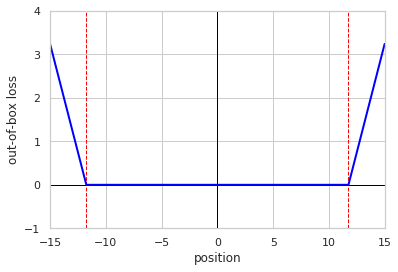

In [35]:
def write_xyz_and_arrows(types, coords, dcoords, out, out2, sample=False, state=0, scale=1):
    '''
    From BxNxT array of types, BxNx3 array of coords, and BxNx3 gradient,
    generate a multi model xyz file (plus gradient) and a pymol script of
    gradient arrows. Optionally sample atom type vector instead of max.
    '''
    i = 0
    for ts, xyzs, dxyzs in zip(types, coords, dcoords):
        out.write('{:d}\n\n'.format(len(ts)))
        
        j = 0
        for t, (x,y,z), (dx,dy,dz) in zip(ts, xyzs, dxyzs):
        
            if sample:
                elem = np.random.choice(elems, p=t)
            else:
                elem = elems[np.argmax(t)]

            out.write('{:s}   {:f}  {:f}  {:f}  {:f}  {:f}  {:f}\n'.format(elem,x,y,z,dx,dy,dz))
            
            x2 = x + scale*dx
            y2 = y + scale*dy
            z2 = z + scale*dz
            out2.write('cgo_arrow [{}, {}, {}], [{}, {}, {}]'.format(x,y,z,x2,y2,z2) + 
                       ', name=arrow_{}_{}, state={}, color=black'.format(i, j, state) +
                       ', radius=0.05, hradius=0.1, hlength=0.25\n')
            j += 1
        i += 1
        
def example_vec_to_tensors(examples, max_n_atoms, device):
    
    batch_size = len(examples)
    n_types = len(examples[0].coord_sets[1].type_vector[0])
    
    # fill tensors with coords, types, and raddi
    coords = torch.zeros(batch_size, max_n_atoms, 3, device=device)
    types = torch.zeros(batch_size, max_n_atoms, n_types+1, device=device)
    radii = torch.zeros(batch_size, max_n_atoms, device=device)
    
    for i, x in enumerate(examples):
        lig = x.coord_sets[1]
        n_atoms = lig.size()
        xyz = torch.tensor(lig.coords)
        t = torch.tensor(lig.type_vector)
        r = torch.tensor(lig.radii)[torch.argmax(t, dim=-1)]
        coords[i,:n_atoms,:] = xyz
        types[i,:n_atoms,:-1] = t
        radii[i,:n_atoms] = r
        types[i,n_atoms:,-1] = 1.0 # dummy type
        
    return coords, types, radii
    
def out_of_box_loss(c, max_val):
    '''hingey loss at box boundaries'''
    return (F.relu(abs(c)-max_val)).sum()

def grad_norm(model):
    total_norm = 0
    for p in model.parameters():
        if p.grad is not None:
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
    total_norm = total_norm ** (1/2)
    return total_norm

def get_ylim(vals):
    min_val = 0 #min(vals)
    max_val = max(vals)
    val_range = max_val - min_val
    return min_val - 0.1*val_range, max_val + 0.1*val_range

x_min, x_max = np.array([-15, 15])
y_min, y_max = np.array([-1, 4])
max_val = 23.5/2
x = torch.arange(x_min, x_max, 0.01)
y = torch.tensor([out_of_box_loss(x_, max_val) for x_ in x])
plt.figure()
plt.ylabel('out-of-box loss')
plt.xlabel('position')
plt.hlines(0, x_min, x_max, 'k', lw=1)
plt.vlines(0, y_min, y_max, 'k', lw=1)
plt.vlines([-max_val, max_val], y_min, y_max, 'r', 'dashed', lw=1)
plt.plot(x, y, 'b', lw=2)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

rnn small.types True False False


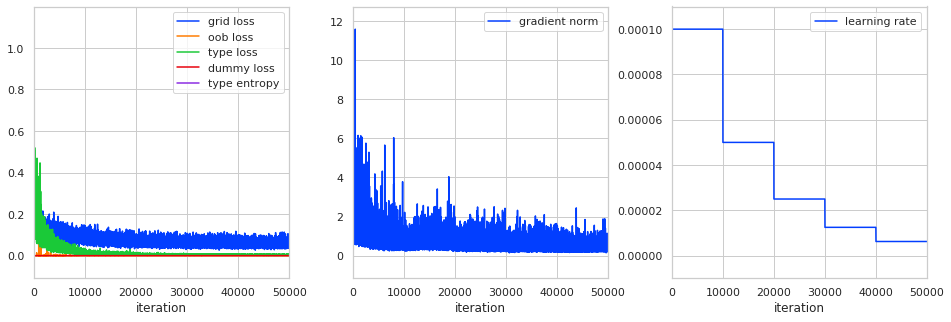

In [39]:
device = 'cuda'
model_type = 'rnn'
batch_size = 10
n_atoms = 50
n_latent = 1024
temp = 0.0
rotate = True
var_coords = False
type_ent = False
do_plot = True

batch_radii = torch.tensor(np.tile(radii, (batch_size, 1)), dtype=torch.float32, device=device)

gmaker = molgrid.GridMaker(resolution=0.5,
                           dimension=23.5,
                           radius_scale=1,
                           radius_type_indexed=True)

dims = gmaker.grid_dimensions(n_types)
grid_size = dims[0] * dims[1] * dims[2] * dims[3]
c2grid = molgrid.Coords2Grid(gmaker, center=(0,0,0))

if model_type == 'cnn':
    model = MolgridCNN(n_atoms, n_types, dims, n_latent, var_coords).to(device)
elif model_type == 'rnn':
    model = MolgridRNN(n_atoms, n_types, dims, n_latent, var_coords, use_att=True).to(device)
elif model_type == 'rnn2':
    model = MolgridRNN2(n_atoms, n_types, dims, n_latent, var_coords, c2grid, batch_radii).to(device)
else:
    raise ValueError('unknown model type {}'.format(model_type))

model.apply(weight_init)

optimizer = optim.Adam(model.parameters(), lr=1e-4)
lr_policy = optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.5)

losses = []
grid_losses = []
oob_losses = []
type_losses = []
dummy_losses = []
type_entropies = []
grad_norms = []
lrs = []

loss_out = open('loss.txt', 'wt')
pred_out = open('pred.xyz', 'wt')
arrows_out = open('pred_arrows.pymol', 'wt')

n_iterations = 50000
step_interval = 10000
print_interval = 1

grid_true = torch.empty(batch_size, *dims, dtype=torch.float32, device=device)
grid_test = torch.empty(batch_size, *dims, dtype=torch.float32, device=device)

coords_test, typesd_test, _ = example_vec_to_tensors(test_examples, n_atoms, device=device)
types_test = typesd_test[:,:,:-1].clone()
dummy_test = typesd_test[:,:,-1].clone()
type_count_test = types_test.sum(dim=1)
gmaker.forward(test_examples, grid_test, random_rotation=False)

fig, ax = plt.subplots(1, 3, sharex=True, squeeze=True, figsize=(16, 5), gridspec_kw=dict(wspace=0.25))
ax[0].plot(grid_losses, label='grid loss')
ax[0].plot(oob_losses, label='oob loss')
ax[0].plot(type_losses, label='type loss')
ax[0].plot(type_losses, label='dummy loss')
ax[0].plot(type_entropies, label='type entropy')
ax[0].legend(loc=0)
ax[0].set_xlabel('iteration')
ax[1].plot(grad_norms, label='gradient norm')
ax[1].legend(loc=0)
ax[1].set_xlabel('iteration')
ax[2].plot(lrs, label='learning rate')
ax[2].legend(loc=0)
ax[2].set_xlabel('iteration')

i = 0
while i < n_iterations:
    try:
        optimizer.zero_grad()
        
        # get next batch of examples and compute true density
        examples = data_loader.next_batch(batch_size)
        coords_true, typesd_true, _ = example_vec_to_tensors(examples, n_atoms, device=device)
        types_true = typesd_true[:,:,:-1].clone()
        dummy_true = typesd_true[:,:,-1].clone()
        type_count_true = types_true.sum(dim=1)
        gmaker.forward(examples, grid_true, random_rotation=rotate)
        
        # generate coords, types, and density from model
        coords_gen, typesd_gen = model(grid_true, coords_true, typesd_true, temp=temp)
        types_gen = typesd_gen[:,:,:-1].clone()
        dummy_gen = typesd_gen[:,:,-1].clone()
        type_count_gen = types_gen.sum(dim=1)
        grid_gen = c2grid(coords_gen, types_gen, batch_radii)
        
        # compute loss
        grid_loss = F.mse_loss(grid_true, grid_gen)
        oob_loss  = out_of_box_loss(coords_gen, max_val=11.5)
        type_loss = F.mse_loss(type_count_true, type_count_gen)
        dummy_loss = F.mse_loss(dummy_true, dummy_gen)
        type_entropy = -torch.sum(typesd_gen * torch.log(typesd_gen)) / (batch_size * n_atoms)
        
        if i == 0: # normalize losses by initial value
            k_grid_loss    = 1/float(grid_loss)
            k_oob_loss     = 1e-2 # avoid divide by zero
            k_type_loss    = 1/float(type_loss)
            k_dummy_loss   = 1/float(dummy_loss)
            k_type_entropy = 0
        
        grid_loss    *= k_grid_loss
        oob_loss     *= k_oob_loss
        type_loss    *= k_type_loss
        dummy_loss   *= k_dummy_loss
        type_entropy *= k_type_entropy
        
        loss = grid_loss + oob_loss + type_loss + dummy_loss + type_entropy
        
        # backpropagate and clip gradient
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 100)
        
        # record metrics
        losses.append(float(loss))
        grid_losses.append(float(grid_loss))
        oob_losses.append(float(oob_loss))
        type_losses.append(float(type_loss))
        dummy_losses.append(float(dummy_loss))
        type_entropies.append(float(type_entropy))
        grad_norms.append(float(grad_norm(model)))
        lrs.append(float(optimizer.param_groups[0]['lr']))
        
        row = (i, losses[-1], grid_losses[-1], oob_losses[-1], type_losses[-1], \
               dummy_losses[-1], type_entropies[-1], grad_norms[-1])
        loss_out.write('%i %f %f %f %f %f %f %f\n' % row)
        loss_out.flush()
        
        # check gradient
        if np.isnan(grad_norms[-1]) or np.isinf(grad_norms[-1]):
            print('gradient norm is {}'.format(grad_norms[-1]))
            break
        
        # update weights
        optimizer.step()
        i += 1

        if i % print_interval == 0: # plot and evaluate test density

            if do_plot: # dynamic plotting
                ax[0].get_lines()[0].set_data(range(i), grid_losses)
                ax[0].get_lines()[1].set_data(range(i), oob_losses)
                ax[0].get_lines()[2].set_data(range(i), type_losses)
                ax[0].get_lines()[3].set_data(range(i), dummy_losses)
                ax[0].get_lines()[3].set_data(range(i), type_entropies)
                ax[0].set_xlim(0, i)
                ax[0].set_ylim(get_ylim(grid_losses+oob_losses+type_losses+dummy_losses+type_entropies))
                ax[1].get_lines()[0].set_data(range(i), grad_norms)
                ax[1].set_xlim(0, i)
                ax[1].set_ylim(get_ylim(grad_norms))
                ax[2].get_lines()[0].set_data(range(i), lrs)
                ax[2].set_xlim(0, i)
                ax[2].set_ylim(get_ylim(lrs))
                display.display(fig)
                display.clear_output(wait=True)
            
            # write out predicted structure and gradient 
            optimizer.zero_grad()
            
            # generate coords, types, and density from model
            coords_gen, typesd_gen = model(grid_test, coords_test, typesd_test, temp=temp)
            coords_gen.retain_grad()
            types_gen = typesd_gen[:,:,:-1].clone()
            dummy_gen = typesd_gen[:,:,-1].clone()
            type_count_gen = types_gen.sum(dim=1)
            grid_gen = c2grid(coords_gen, types_gen, batch_radii)
            
            # compute loss
            grid_loss = F.mse_loss(grid_test, grid_gen)
            oob_loss  = out_of_box_loss(coords_gen, max_val=11.5)
            type_loss = F.mse_loss(type_count_test, type_count_gen)
            dummy_loss = F.mse_loss(dummy_test, dummy_gen)
            type_entropy = -torch.sum(typesd_gen * torch.log(typesd_gen)) / (batch_size * n_atoms)
            
            grid_loss    *= k_grid_loss
            oob_loss     *= k_oob_loss
            type_loss    *= k_type_loss
            dummy_loss   *= k_dummy_loss
            type_entropy *= k_type_entropy
            
            loss = grid_loss + oob_loss + type_loss + dummy_loss + type_entropy
            
            # backpropagate and clip gradient
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 100)

            # write out generated structure and gradient
            write_xyz_and_arrows(
                typesd_gen.detach().cpu().numpy()[:1,:,:],
                coords_gen.detach().cpu().numpy()[:1,:,:],
                coords_gen.grad.detach().cpu().numpy()[:1,:,:],
                pred_out, arrows_out, sample=True,
                state=i//print_interval,
                scale=-5000)
            pred_out.flush()
            arrows_out.flush()

            # check for convergence
            if i > 2 and abs(losses[-1] - losses[-2])/abs(losses[-2]) < 1e-6: 
                print('converged')
                break
        
        if i % step_interval == 0:
            lr_policy.step()
    
    except KeyboardInterrupt:
        print('interrupted')
        break

print(model_type, os.path.basename(data_file).split()[0], rotate, var_coords, type_ent)

In [ ]:
print(k_grid_loss, k_oob_loss, k_type_loss, k_type_entropy)

In [ ]:
elems